In [ ]:
#importing the files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
#reading the data set

In [3]:
df = pd.read_csv('/Users/sathwik/Downloads/diabetes.csv')

In [ ]:
#printing first five rows of the dataset

In [5]:
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#dataset info

In [7]:
print("\nDataset info:")
display(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

In [ ]:
#Statistical summary

In [9]:
print("\nStatistical summary:")
display(df.describe())


Statistical summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Missing values count

In [11]:
print("\nMissing values count:")
display(df.isnull().sum())


Missing values count:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [15]:
df[zero_cols] = df[zero_cols].replace(0, np.nan)

In [17]:
print("\nMissing values after replacing 0s:")
display(df.isnull().sum())


Missing values after replacing 0s:


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [23]:
for col in zero_cols:
    df.update(df[col].fillna(df[col].median()))

In [25]:
print("\nMissing values after imputation:")
display(df.isnull().sum())


Missing values after imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [27]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [33]:
print("\nFirst 5 rows after standardization:")
display(X_scaled.head())



First 5 rows after standardization:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


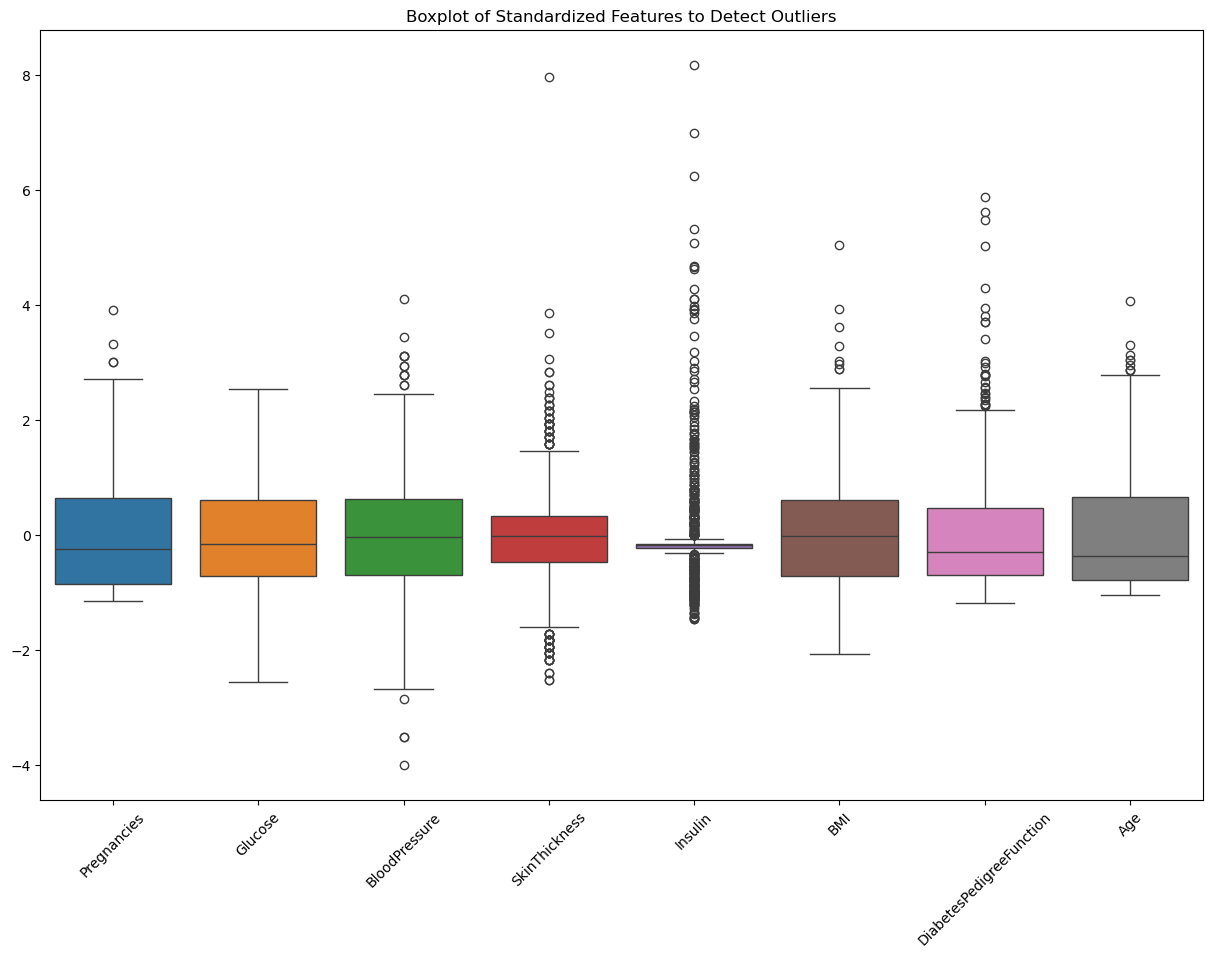

In [35]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=X_scaled)
plt.title('Boxplot of Standardized Features to Detect Outliers')
plt.xticks(rotation=45)
plt.show()


In [37]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df


In [39]:
X_clean = remove_outliers(X_scaled, X_scaled.columns)


In [41]:
print(f"\nShape before outlier removal: {X_scaled.shape}")
print(f"Shape after outlier removal: {X_clean.shape}")


Shape before outlier removal: (768, 8)
Shape after outlier removal: (329, 8)


In [43]:
df_clean = pd.concat([X_clean, y[X_clean.index]], axis=1)

In [45]:
print("\nCleaned dataset info:")
display(df_clean.info())



Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 329 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               329 non-null    float64
 1   Glucose                   329 non-null    float64
 2   BloodPressure             329 non-null    float64
 3   SkinThickness             329 non-null    float64
 4   Insulin                   329 non-null    float64
 5   BMI                       329 non-null    float64
 6   DiabetesPedigreeFunction  329 non-null    float64
 7   Age                       329 non-null    float64
 8   Outcome                   329 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 25.7 KB


None

In [47]:
df_clean.to_csv('diabetes_clean.csv', index=False)
print("\nCleaned dataset saved to 'diabetes_clean.csv'")


Cleaned dataset saved to 'diabetes_clean.csv'
